*Warning*: Distribution/sharing of this notebook and other lab notebooks on the internet and other sources is strictly prohibited. You should not provide this notebook to anyone else. you should just use it for the purpose of this assessment only.

You should attempt and submit your work. you can refer to sources/APIs to complete this taks. Copying from each other even a part or so is strictly prohibited and may result in serious action.


# Predictive Analytics for Trending Videos


This assessmet will enable you achieve essential experience of machine learning using sklearn and scalable approach to machine learning based on park ML!

The focus of this assessment is to explore what makes videos popular on various platforms, e.g., Netflix and YouTube. The assessment will focus on YouTube 's data.

**PLEASE NOTE** There can be multiple solutions possible for this assessment. various students will end up implementing different solutions. Therefore, there is not a single solution to fit all students.

### Required Libraries
Setup the libraries using the following cells. You should select Java 8 when prompted.

In [ ]:
! sudo apt install openjdk-8-jdk
! sudo update-alternatives --config java

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libgail-common libgail18 libgtk2.0-0
  libgtk2.0-bin libgtk2.0-common libice-dev librsvg2-common libsm-dev
  libxkbfile1 libxt-dev libxtst6 libxxf86dga1 openjdk-8-jdk-headless
  openjdk-8-jre openjdk-8-jre-headless x11-utils
Suggested packages:
  gvfs libice-doc libsm-doc libxt-doc openjdk-8-demo openjdk-8-source visualvm
  libnss-mdns fonts-nanum fonts-ipafont-gothic fonts-ipafont-mincho
  fonts-wqy-microhei fonts-wqy-zenhei fonts-indic mesa-utils
The following NEW packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libgail-common libgail18 libgtk2.0-0
  libgtk2.0-bin libgtk2.0-common libice-dev librsvg2-common libsm-dev
  libxkbfile1 libxt-dev libxtst6 libxxf86dga1 open

In [ ]:
!pip3 install pandas==1.0.5


In [ ]:
# if restart of runtime is successful, the execution of this cell should
# prints True

import pandas as pd
print(pd.__version__ == '1.0.5')

False


In [ ]:
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import glob
import seaborn as sns
import re
import os
from matplotlib import pyplot
import seaborn
import random
pd.options.mode.chained_assignment = None

Import your dataset using the following cells for the Youtube videos

In [ ]:
#from google.colab import files
#uploaded = files.upload()

#!unzip /content/youtube_data.zip

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Section 1. : Machine Learning with Sklearn

## 1.1.1 Data loading and Preprocessing

The dataset consists of a daily record of the top trending YouTube videos.

To determine the year’s top-trending videos, YouTube uses a combination of factors including measuring users interactions, e.g., number of views, shares, comments and likes. "Note that they’re not the most-viewed videos overall for the calendar year”. Top performers on the YouTube trending list are music videos (such as the famously viral “[Gangnam Style](https://www.youtube.com/watch?v=9bZkp7q19f0)”), celebrity and/or reality TV performances, and the random dude-with-a-camera viral videos that YouTube is well-known for.

This dataset includes several months (and counting) of data on daily trending YouTube videos. Data is included for numerous countries, with up to 200 listed trending videos per day.

Each region’s data is in a separate file. Data includes:

*   Video Title
*   Channel title
*   Publish time
*   Tags
*   Views
*   Likes
*   Dislikes
*   Description
*   Comment count

The data also includes a category\_id field, which varies between regions. To retrieve the categories for a specific video, find it in the associated JSON. One such file is included for each of the five regions in the dataset.

For more information on specific columns in the dataset refer to the column metadata.



#### 1.1.1.1: Combining Multiple CSV's.

There are multiple csv files in the dataset, each corresponding to a specific country. As a first step you need to read them and combine these csv files into a single dataframe. Use 'video_id' as your index.

While combining them, you also need to create a column for "country" and fill it in the final dataframe. The country name can be extracted using the filename itself.

Name your dataframe "combined_data".

In [ ]:
# Import all the csv files
#files = [i for i in glob.glob('/content/youtube_data/*.csv'.format('csv'))]
files = [i for i in glob.glob('/content/gdrive/MyDrive/youtube_data/*.csv'.format('csv'))]
sorted(files)

# Task: Merge all dataframes to single dataframe "combined_data" and add a 'country' column.
all_dataframes = list()
for csv in files:
  #all_dataframes.append(pd.read_csv(csv))
  frame = pd.read_csv(csv,index_col=0)
  frame['country'] = os.path.basename(csv)
  all_dataframes.append(frame)

combined_data = pd.concat(all_dataframes)
combined_data['country']=combined_data['country'].map(lambda x: x.lstrip('+-').rstrip('videos.csv'))
combined_data

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
video_id,,,,,,,,,,,,,,,,
kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,IN
zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",IN
10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,IN
N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,IN
kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,IN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,US
1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,US
D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,US


#### 1.1.1.2: Map category Id's to categories

Read the category_id.json file and map the category_id's in the dataframe to the category name.

Use json.load to read in the data in the json file as a python dictionary and then map the category id given in the dataframe to category name from the json file. (Hint: the US json is likely the most comprehensive reference)




In [ ]:
combined_data['category_id'] = combined_data['category_id'].astype(str)
js_files = [i for i in glob.glob('/content/gdrive/MyDrive/youtube_data/*.json')]
sorted(js_files)

id_to_category = {}
for x in js_files:
  js = pd.read_json(x)
  for category in js ["items"]:
        id_to_category[category["id"]] = category["snippet"]["title"]
combined_data["category"] = combined_data["category_id"].map(id_to_category)
#

combined_data.head(10)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category
video_id,,,,,,,,,,,,,,,,,
kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,IN,Film & Animation
zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",IN,News & Politics
10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,IN,Entertainment
N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,IN,Comedy
kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,IN,Entertainment
il_pSa5l98w,17.14.11,"MCA (Middle Class Abbayi) TEASER - Nani,Sai Pa...",Dil Raju,24,2017-11-10T04:29:50.000Z,"Nenu Local|""Nenu Local Telugu Movie""|""Nani""|""S...",6106669,98612,4185,4763,https://i.ytimg.com/vi/il_pSa5l98w/default.jpg,False,False,False,Watch MCA- Middle Class Abbayi First Look Teas...,IN,Entertainment
7MxiQ4v0EnE,17.14.11,Daang ( Full Video ) | Mankirt Aulakh | Sukh S...,Speed Records,10,2017-11-11T16:41:15.000Z,"punjabi songs|""punjabi bhangra""|""punjabi music...",5718766,127477,7134,8063,https://i.ytimg.com/vi/7MxiQ4v0EnE/default.jpg,False,False,False,Song - Daang\nSinger - Mankirt Aulakh\nFaceboo...,IN,Music
c64I9HNpiOY,17.14.11,Padmavati : Ek Dil Ek Jaan Video Song | Deepik...,T-Series,10,2017-11-11T06:14:19.000Z,"Ek Dil Ek Jaan Video Song|""'Ek Dil Ek Jaan'""|""...",10588371,132738,8812,10847,https://i.ytimg.com/vi/c64I9HNpiOY/default.jpg,False,False,False,Presenting the song 'Ek Dil Ek Jaan' from Padm...,IN,Music
KObFEYCaRx8,17.14.11,Chiranjeevi in Naga Chaitanya - Samantha Recep...,Top Telugu Media,24,2017-11-13T04:42:26.000Z,Chiranjeevi in Naga Chaitanya - Samantha Recep...,118223,520,53,23,https://i.ytimg.com/vi/KObFEYCaRx8/default.jpg,False,False,False,Chiranjeevi in Naga Chaitanya - Samantha Recep...,IN,Entertainment


#### 1.1.1.3: Fix datetime format and remove rows with NA's (1 pt)

The 'publish_time' and 'trending_date' features are not in a unix datetime format, so use pandas to_datetime() to convert it into the right format.

After that is done remove all the rows which have NA's in them.

In [ ]:
combined_data.info()
combined_data['trending_date'] = pd.to_datetime(combined_data["trending_date"],format ="%y.%d.%m")
combined_data['publish_time'] = pd.to_datetime(combined_data["publish_time"],format = "%Y-%m-%dT%H:%M:%S.%fZ")


combined_data = combined_data.dropna()
combined_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 159906 entries, kzwfHumJyYc to ooyjaVdt-jA
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   trending_date           159906 non-null  object
 1   title                   159906 non-null  object
 2   channel_title           159906 non-null  object
 3   category_id             159906 non-null  object
 4   publish_time            159906 non-null  object
 5   tags                    159906 non-null  object
 6   views                   159906 non-null  int64 
 7   likes                   159906 non-null  int64 
 8   dislikes                159906 non-null  int64 
 9   comment_count           159906 non-null  int64 
 10  thumbnail_link          159906 non-null  object
 11  comments_disabled       159906 non-null  bool  
 12  ratings_disabled        159906 non-null  bool  
 13  video_error_or_removed  159906 non-null  bool  
 14  description             15

In [ ]:
# print
print('validate_na',(combined_data.shape))

validate_na (154567, 17)


## 1.2 Exploratory Data Analysis & Feature Engineering


**Exploratory Data Analysis:**
EDA aims to analyze data sets by summarizing its key characteristics assisted by visualizations. EDA communicates insights beyond formal modeling/hypothesis testing with or without statistical model.

**Feature Engineering:**
The primary object of feature engineering is to extract features using domain knowledge. It aims to extract features from raw data using various data mining approaches.

These features are fed to various machine learning classifiers. These features are also called as covariates, predicators, or simply a new column in data frame.

##### 1.2.1: Calculating Mean, standard deviation, min and max.

In this section, we will focus to compute various satistics, i.e., mean, standard deviation, min and max for numerical features in the dataset and then store them into lists, i.e.,  [views, likes, dislikes, comment_count].

means = [views_mean, likes_mean, dislikes_mean, comment_count_mean] and similarly for mins, maxs and stds.

In [ ]:
combined_data.describe()

,views,likes,dislikes,comment_count
count,1.545670e+05,1.545670e+05,1.545670e+05,1.545670e+05
mean,1.281578e+06,4.096105e+04,2.056138e+03,4.606594e+03
std,4.605292e+06,1.521490e+05,1.825854e+04,2.327823e+04
min,2.230000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.574900e+04,1.321000e+03,8.100000e+01,1.720000e+02
50%,3.134280e+05,6.336000e+03,2.980000e+02,7.650000e+02
75%,9.473390e+05,2.594050e+04,1.024000e+03,2.726000e+03
max,2.252119e+08,5.613827e+06,1.643059e+06,1.228655e+06


In [ ]:

maxs = combined_data.describe().iloc[7].values.tolist()
mins = combined_data.describe().iloc[3].values.tolist()
stds = combined_data.describe().iloc[2].values.tolist()
means = combined_data.describe().iloc[1].values.tolist()



In [ ]:
# print here
print('check_min_max_mean_std',([maxs, mins, stds, means]))


check_min_max_mean_std [[225211923.0, 5613827.0, 1643059.0, 1228655.0], [223.0, 0.0, 0.0, 0.0], [4605292.478385794, 152148.95485475138, 18258.541379660703, 23278.225620617904], [1281578.03423758, 40961.05191276275, 2056.138490104615, 4606.593742519425]]


#### 1.2.2: Rescaling the features

From the above section, it is clear that the numerical values range is really high.  we can use rescaling to avoid numerical instability problems. We can rescale likes, views, dislikes, and comment_count using log scale (base e). Let us store rescaled features in dataframe as likes_log, views_log, dislikes_log and comment_log.

NOTE- log 0 is not defined, therefore, you should add 1 to each value prior to taking the log.

In [ ]:
combined_data['likes_log'] = np.log(1 + combined_data['likes'])
combined_data['views_log'] = np.log(1 + combined_data['views'])
combined_data['dislikes_log'] = np.log(1 + combined_data['dislikes'])
combined_data['comment_log'] = np.log(1 + combined_data['comment_count'])

In [ ]:
# Print results
print('check_feature_rescaling',([np.mean(combined_data['likes_log']),np.mean(combined_data['views_log']),np.mean(combined_data['dislikes_log']),
                                         np.mean(combined_data['comment_log'])]))

check_feature_rescaling [8.571590187188637, 12.552679805013259, 5.614484952080614, 6.424543615107988]


#### 1.2.3: Plotting the distribution (2 pt)

Plot the distribution for the newly created log features. They should look like normal distribution curves.

<Axes: ylabel='Density'>

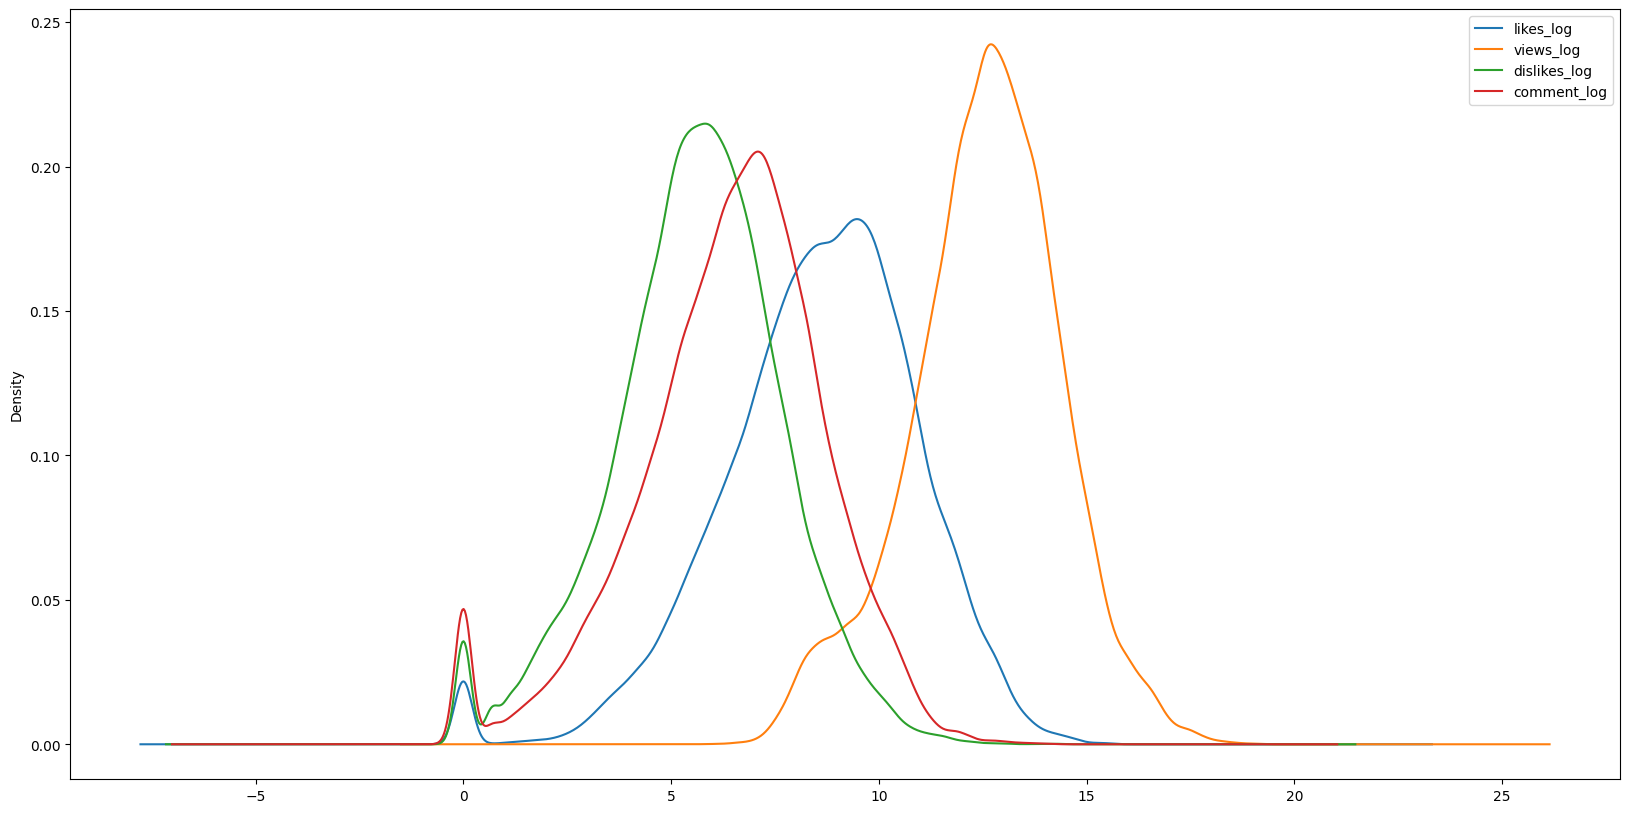

In [ ]:
#  plotting the distribution
log_df=combined_data[['likes_log','views_log','dislikes_log','comment_log']]
log_df.plot.kde(figsize=(20,10))
# plot data

#### 1.2.4: Comparing views, likes, dislikes against categories

Let us gain isights into data using various catergories, views, likes and dislikes.

Draw three plots for the following:

1.) How many videos are there for each category?

2.) What is the distribution of views against categories? (Use boxplot and views on log scale)

3.) What is the distribution of dislikes against categories? (Use boxplot and dislikes on log scale)

For extra credit:
You can try to gain more insights into the dataset by drawing interesting plots. Some ideas include:

* How long does a video trend in a country?
* What are some videos which got popular because they were disliked?

Think of such interesting things and add here. We will award points based on creativity of the insights that you get.

In [ ]:
##1-Total videos for each category:
by_category = combined_data.groupby(["category"]).size().sort_values(ascending = False)
print('Total videos for each category: \n', by_category)

Total videos for each category: 
 category
Entertainment            48964
Music                    17818
Comedy                   14790
News & Politics          14713
People & Blogs           13954
Sports                    9488
Howto & Style             9309
Film & Animation          7874
Science & Technology      4846
Education                 4544
Gaming                    3592
Pets & Animals            1522
Autos & Vehicles          1406
Travel & Events            889
Shows                      485
Nonprofits & Activism      338
Movies                      33
Trailers                     2
dtype: int64


In [ ]:
import plotly.express as px
df_cat=pd.DataFrame(by_category)
df_cat['category'] = df_cat.index
df_cat.columns=['a','b']
fig4 = px.bar(df_cat, x="b", y="a",color='a',labels={'b':'Category','a':'Videos/Category'}, height=400)
fig4.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)','paper_bgcolor': 'rgba(0, 0, 0, 0)',})

(Text(0.5, 1.0, 'Distribution of Views against Categories'),
 Text(0.5, 0, 'Video Category'),
 Text(0, 0.5, 'View Logs'))

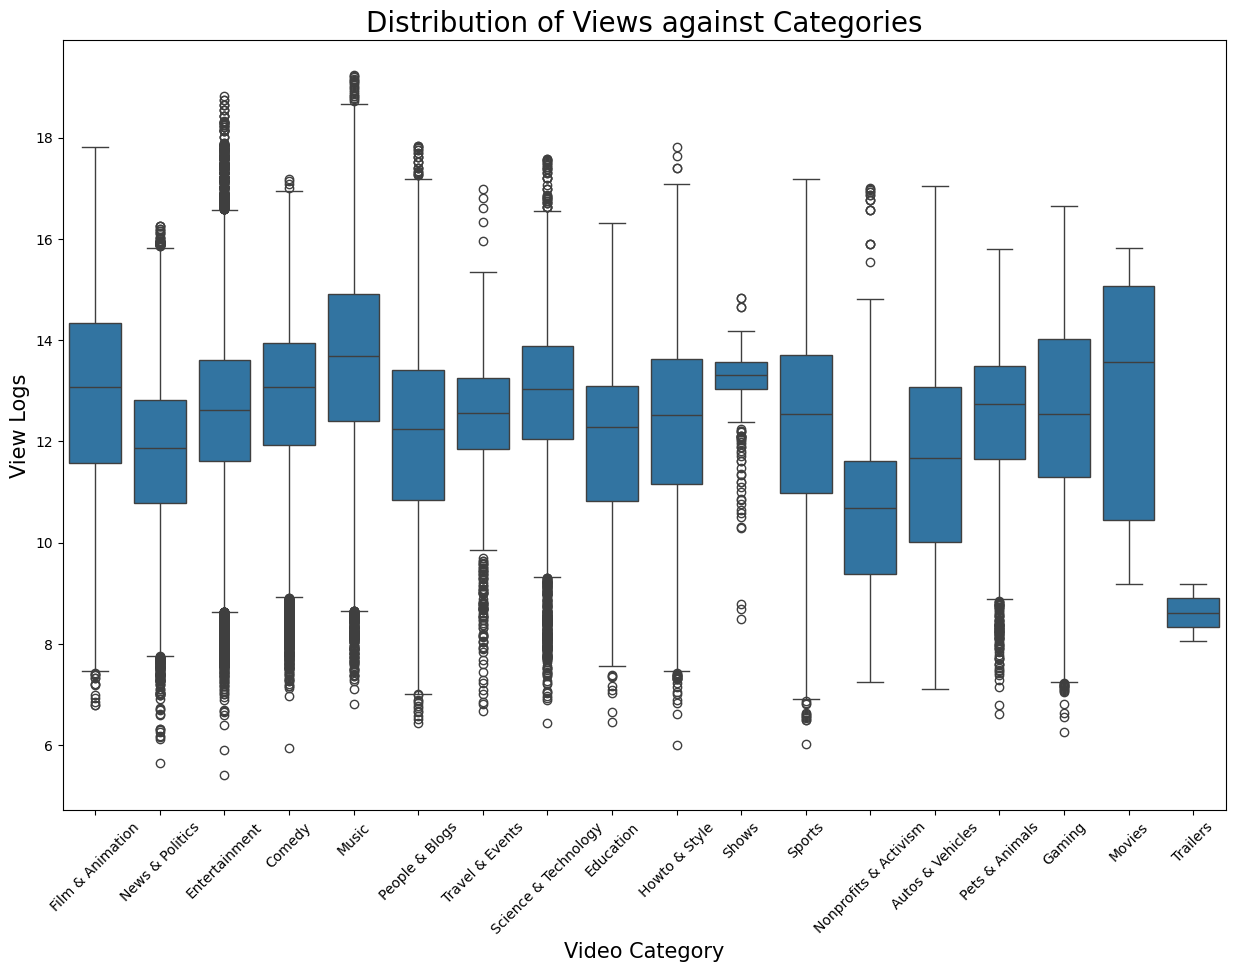

In [ ]:
##2-Distribution of views against categories, using boxplot and views on log scale
fig, ax = pyplot.subplots(figsize=(15,10))
sns.boxplot(x="category", y="views_log", data=combined_data[['category','views_log']]),plt.xticks(rotation = 45)
ax.set_title("Distribution of Views against Categories",fontsize=20),ax.set_xlabel('Video Category',fontsize=15),ax.set_ylabel(ylabel='View Logs',fontsize=15)


(Text(0.5, 1.0, 'Distribution of Dislikes against Categories'),
 Text(0.5, 0, 'Video Category'),
 Text(0, 0.5, 'Dislike Logs'))

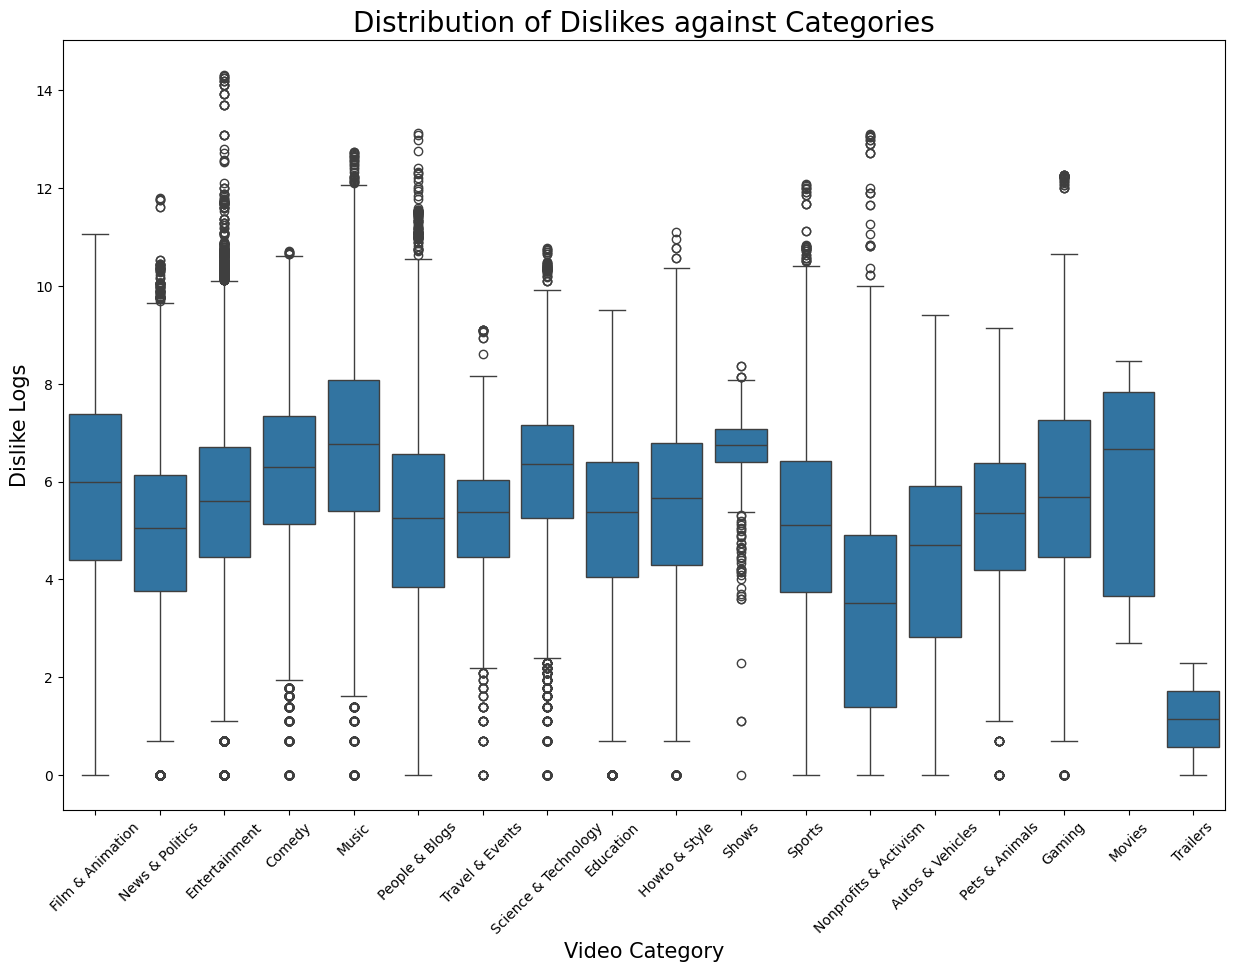

In [ ]:
##3-Distribution of dislikes against categories, Using boxplot and dislikes on log scale
fig, ax = pyplot.subplots(figsize=(15,10))
sns.boxplot(x="category", y="dislikes_log", data=combined_data[['category','dislikes_log']]),plt.xticks(rotation = 45)
ax.set_title("Distribution of Dislikes against Categories",fontsize=20),ax.set_xlabel('Video Category',fontsize=15),ax.set_ylabel(ylabel='Dislike Logs',fontsize=15)


In [ ]:
#How long does a video trend in a country?
#What are some videos which got popular because they were disliked?

**How long does a video trend in a country?**

(<Axes: title={'center': 'Number of Mean Video Trending in Each Country '}, xlabel='Country', ylabel='Mean Trinding days'>,
 Text(0.5, 1.0, 'Number of Mean Video Trending in Each Country '))

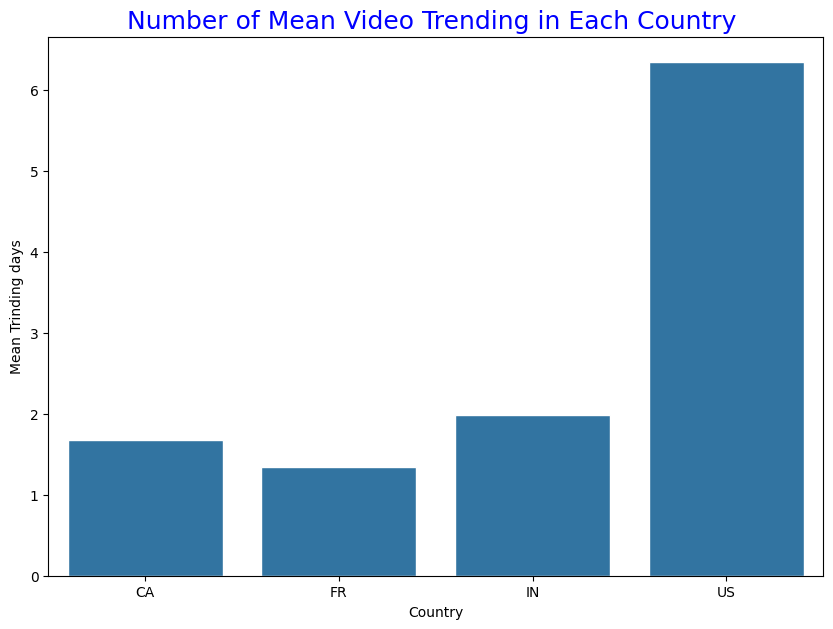

In [ ]:
df=combined_data.drop_duplicates()
df1=df.groupby(['title','country']).size().reset_index(name='count')
trending=df1.groupby('country')['count'].mean().to_frame().reset_index().rename(columns={"country": "Country", "count": "Mean Trinding days"})

fig, ax = pyplot.subplots(figsize=(10, 7)),sns.set(font_scale=1.5)
sns.barplot(x="Country", y="Mean Trinding days", data=trending,ax=ax),plt.title('Number of Mean Video Trending in Each Country ',color='Blue')

**What are some videos which got popular because they were disliked?**

In [ ]:
df2=df.groupby(['title','dislikes','likes']).size().reset_index(name='Trend_Days')
trending_dislikes=df2.loc[(df2['dislikes'] > df2['likes']) & (df2['Trend_Days'] >= 3)] #Videos which got trends and have dislikes more than likes#
trending_dislikes=trending_dislikes.sort_values(['Trend_Days'],ascending=[ False])
print('Videos which got popular because they were disliked: \n \n',trending_dislikes.title.to_string(index=False))

Videos which got popular because they were disliked: 
 
 Jeffrey Tambor Fired From 'Transparent' Followi...
5 Things You Missed at the 2018 SAG Awards | E!...
Fergie Performs The U.S. National Anthem / 2018...
                        Staudt on Sports I 1-22-18
         WATCH: Sen. Mitch McConnell on tax reform
                               二贵摔跤 - tienghoa.net


#### 1.2.5: Feature Engineering



##### a. Processing tags

The feature tags in the dataset has a delimiter, use that delimiter to count the number of tags, create a feature called num_tags and add that to the dataset.

In [ ]:
num_tags=[]
xdf=combined_data.reset_index(drop=True)
for i in range(len(combined_data)):
  if xdf.at[i,'tags']=='[none]': #some videos has no tags but instead [none], so we are going to consider it as Zero tags.
    count=0
  else:
    count=(xdf.at[i,'tags']).count("|") + 1
  num_tags.append(count)
combined_data['num_tags']=num_tags
combined_data


,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,...,ratings_disabled,video_error_or_removed,description,country,category,likes_log,views_log,dislikes_log,comment_log,num_tags
video_id,,,,,,,,,,,,,,,,,,,,,
kzwfHumJyYc,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12 12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,...,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,IN,Film & Animation,10.433145,13.907477,6.683361,6.783325,15
zUZ1z7FwLc8,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13 05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,...,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",IN,News & Politics,6.601230,13.288051,6.807935,0.000000,19
10L1hZ9qa58,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12 15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,...,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,IN,Entertainment,7.606885,13.068939,5.497168,5.010635,14
N1vE8iiEg64,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12 07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,...,False,False,This video showcases the difference between pe...,IN,Comedy,11.161295,14.032782,7.393263,7.895436,20
kJzGH0PVQHQ,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13 01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,...,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,IN,Entertainment,6.200509,13.047674,5.683580,4.204693,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1PhPYr_9zRY,2018-06-14,BTS Plays With Puppies While Answering Fan Que...,BuzzFeed Celeb,22,2018-05-18 16:39:29,"BuzzFeed|""BuzzFeedVideo""|""Puppy Interview""|""pu...",8259128,645888,4052,62610,...,False,False,"BTS with the PPS, the puppies. These adorable ...",US,People & Blogs,13.378383,15.926830,8.307213,11.044696,27
BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18 13:00:04,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,...,False,False,The Cat Who Caught the Laser - Aaron's Animals,US,Pets & Animals,10.549569,14.337638,7.234177,7.885329,14
D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18 17:34:22,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,...,False,False,I had so much fun transforming Safiyas hair in...,US,Entertainment,10.780393,13.879848,6.940222,8.292298,24


##### b. Processing description and title

Calculate the length of description and title and add them as features to the dataset

In [ ]:
combined_data["desc_len"]=combined_data["description"].apply(lambda x: len(x))

In [ ]:
combined_data["len_title"]=combined_data["title"].apply(lambda x: len(x))

In [ ]:
# Print cell
print('check_tags_title_description \n',([combined_data['num_tags'].describe(),combined_data['desc_len'].describe(),combined_data['len_title'].describe()]))

check_tags_title_description 
 [count    154567.000000
mean         18.580551
std          11.929906
min           0.000000
25%           9.000000
50%          17.000000
75%          26.000000
max         124.000000
Name: num_tags, dtype: float64, count    154567.000000
mean        959.949426
std         857.504028
min           1.000000
25%         363.000000
50%         717.000000
75%        1288.000000
max        5260.000000
Name: desc_len, dtype: float64, count    154567.000000
mean         56.408541
std          22.976198
min           2.000000
25%          38.000000
50%          54.000000
75%          74.000000
max         100.000000
Name: len_title, dtype: float64]


##### c. Processing publish_time.


Split 'publish_time' feature into three parts time, date, and weekday, where time will contain the time component of the original feature and date and weekday will store the corresponding date and weekday number respectively. Start with 1 for Monday and end with 7 for Sunday.

In [ ]:
date_data=combined_data['publish_time']

In [ ]:
combined_data['publish_time'] =date_data.apply(lambda x: pd.to_datetime(x).time())
combined_data['publish_date'] =date_data.apply(lambda x: pd.to_datetime(x).date())

#day on which video was published
combined_data['publish_weekday']=date_data.apply(lambda x: x.dayofweek)+1

import random
random_index = random.randint(0,combined_data.shape[0]-1)


In [ ]:
# Print cell
print('check_date_time_processing',([combined_data['publish_time'].iloc[random_index],combined_data['publish_date'].iloc[random_index],sorted(list(combined_data["publish_weekday"].value_counts()))]))

check_date_time_processing [datetime.time(22, 58, 20), datetime.date(2017, 12, 1), [18641, 18931, 22146, 22501, 22523, 23573, 26252]]


##### d. Number of videos per weekday

Calculate the number of videos published per day of the week. Which day of the week do people publish most videos? Make a visualization demonstrating the result.

(<Axes: title={'center': 'Number of puplished videos per week days '}, xlabel='Week_Days', ylabel='No_of_videos'>,
 Text(0.5, 1.0, 'Number of puplished videos per week days '))

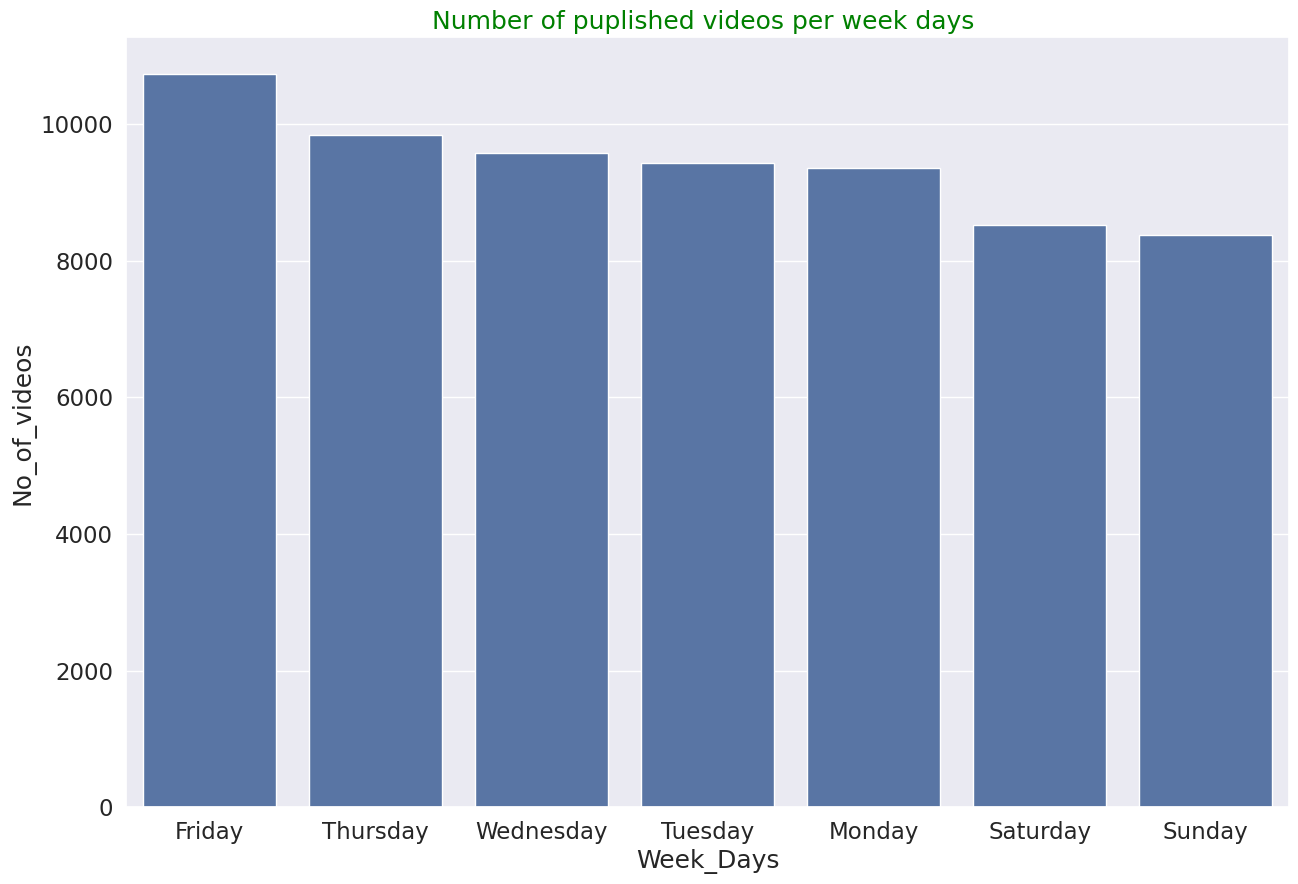

In [ ]:
# plot here

##Creating dataframe after deleting videos which stay trending for more than one day according to the Video ID
dfx=combined_data.reset_index(level=0)[['video_id','publish_weekday']].drop_duplicates(subset = ['video_id'], keep = 'last')

##Mapping the day number : day name
dayOfWeek={1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday', 7:'Sunday'}
dfx['publish_weekday'] = dfx['publish_weekday'].map(dayOfWeek)

##Calculating and plotting
videos_weekday = dfx['publish_weekday'].value_counts().to_frame().reset_index().rename(columns={"index": "Week_Days", "publish_weekday": "No_of_videos"})
fig, ax = pyplot.subplots(figsize=(15, 10)),sns.set(font_scale=1.5)
sns.barplot(x="Week_Days", y="No_of_videos", data=videos_weekday,ax=ax),plt.title('Number of puplished videos per week days ',color='Green')
# Plots will be manually graded

#### 1.2.6: Dropping irrelevant non numeric columns

Drop all the columns that are non-numeric as we have processed them and stored the information captured in them in the dataset as numbers.

Note that a few key columns are non-numeric but should be kept in the dataframe:

comments_disabled, ratings_disabled, video_error_or_removed, country

Also drop original views, like, comments and dislikes as you have processed them as logs and stored them as separate feature.

In [ ]:
combined_data.columns

Index(['trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'category',
       'likes_log', 'views_log', 'dislikes_log', 'comment_log', 'num_tags',
       'desc_len', 'len_title', 'publish_date', 'publish_weekday'],
      dtype='object')

In [ ]:
combined_data.drop(['trending_date', 'title', 'channel_title', 'category_id',
                    'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
                    'thumbnail_link', 'description', 'publish_date'], axis = 1,inplace = True)

In [ ]:
combined_data

,comments_disabled,ratings_disabled,video_error_or_removed,country,category,likes_log,views_log,dislikes_log,comment_log,num_tags,desc_len,len_title,publish_weekday
video_id,,,,,,,,,,,,,
kzwfHumJyYc,False,False,False,IN,Film & Animation,10.433145,13.907477,6.683361,6.783325,15,920,81,7
zUZ1z7FwLc8,True,False,False,IN,News & Politics,6.601230,13.288051,6.807935,0.000000,19,2232,58,1
10L1hZ9qa58,False,False,False,IN,Entertainment,7.606885,13.068939,5.497168,5.010635,14,482,58,7
N1vE8iiEg64,False,False,False,IN,Comedy,11.161295,14.032782,7.393263,7.895436,20,263,30,7
kJzGH0PVQHQ,False,False,False,IN,Entertainment,6.200509,13.047674,5.683580,4.204693,11,753,88,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1PhPYr_9zRY,False,False,False,US,People & Blogs,13.378383,15.926830,8.307213,11.044696,27,926,52,5
BZt0qjTWNhw,False,False,False,US,Pets & Animals,10.549569,14.337638,7.234177,7.885329,14,46,28,5
D6Oy4LfoqsU,False,False,False,US,Entertainment,10.780393,13.879848,6.940222,8.292298,24,775,84,5


#### 1.2.7: Convert categorical features in the dataset into one hot vectors.

There are three categorical features remaining in the dataset, identify them and convert them into one hot vectors. Be sure that when you one hot encode, the original column is replaced.

In [ ]:
combined_data.publish_weekday = combined_data.publish_weekday.astype('category')
combined_data.country = combined_data.country.astype('category')
combined_data.category = combined_data.category.astype('category')
combined_data= pd.get_dummies(combined_data)
# Hint: Use pd.get_dummies()range.

In [ ]:
combined_data

,comments_disabled,ratings_disabled,video_error_or_removed,likes_log,views_log,dislikes_log,comment_log,num_tags,desc_len,len_title,...,category_Sports,category_Trailers,category_Travel & Events,publish_weekday_1,publish_weekday_2,publish_weekday_3,publish_weekday_4,publish_weekday_5,publish_weekday_6,publish_weekday_7
video_id,,,,,,,,,,,,,,,,,,,,,
kzwfHumJyYc,False,False,False,10.433145,13.907477,6.683361,6.783325,15,920,81,...,0,0,0,0,0,0,0,0,0,1
zUZ1z7FwLc8,True,False,False,6.601230,13.288051,6.807935,0.000000,19,2232,58,...,0,0,0,1,0,0,0,0,0,0
10L1hZ9qa58,False,False,False,7.606885,13.068939,5.497168,5.010635,14,482,58,...,0,0,0,0,0,0,0,0,0,1
N1vE8iiEg64,False,False,False,11.161295,14.032782,7.393263,7.895436,20,263,30,...,0,0,0,0,0,0,0,0,0,1
kJzGH0PVQHQ,False,False,False,6.200509,13.047674,5.683580,4.204693,11,753,88,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1PhPYr_9zRY,False,False,False,13.378383,15.926830,8.307213,11.044696,27,926,52,...,0,0,0,0,0,0,0,1,0,0
BZt0qjTWNhw,False,False,False,10.549569,14.337638,7.234177,7.885329,14,46,28,...,0,0,0,0,0,0,0,1,0,0
D6Oy4LfoqsU,False,False,False,10.780393,13.879848,6.940222,8.292298,24,775,84,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Print cell.
print('check_final_df',(combined_data.shape))

check_final_df (154567, 39)


Let's write out the modified data we created to a file so that we can reuse it in Section 2.

In [ ]:
combined_data_sec_2 = combined_data.copy()
combined_data_sec_2.rename(columns = {'views_log':'label'}, inplace = True)
combined_data_sec_2.to_csv('combined_data.csv')

#### 1.2.8: Split into x and y

Split the data into features and label, in this case the features are anything but views_log and the label is views_log.

In [ ]:
combined_data.columns

Index(['comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'likes_log', 'views_log', 'dislikes_log', 'comment_log', 'num_tags',
       'desc_len', 'len_title', 'country_CA', 'country_FR', 'country_IN',
       'country_US', 'category_Autos & Vehicles', 'category_Comedy',
       'category_Education', 'category_Entertainment',
       'category_Film & Animation', 'category_Gaming',
       'category_Howto & Style', 'category_Movies', 'category_Music',
       'category_News & Politics', 'category_Nonprofits & Activism',
       'category_People & Blogs', 'category_Pets & Animals',
       'category_Science & Technology', 'category_Shows', 'category_Sports',
       'category_Trailers', 'category_Travel & Events', 'publish_weekday_1',
       'publish_weekday_2', 'publish_weekday_3', 'publish_weekday_4',
       'publish_weekday_5', 'publish_weekday_6', 'publish_weekday_7'],
      dtype='object')

In [ ]:
combined_data=pd.read_csv('combined_data.csv').set_index('video_id')
label = combined_data['label']
features = combined_data.drop(['label'],axis=1)

In [ ]:
combined_data

,comments_disabled,ratings_disabled,video_error_or_removed,likes_log,label,dislikes_log,comment_log,num_tags,desc_len,len_title,...,category_Sports,category_Trailers,category_Travel & Events,publish_weekday_1,publish_weekday_2,publish_weekday_3,publish_weekday_4,publish_weekday_5,publish_weekday_6,publish_weekday_7
video_id,,,,,,,,,,,,,,,,,,,,,
kzwfHumJyYc,False,False,False,10.433145,13.907477,6.683361,6.783325,15,920,81,...,0,0,0,0,0,0,0,0,0,1
zUZ1z7FwLc8,True,False,False,6.601230,13.288051,6.807935,0.000000,19,2232,58,...,0,0,0,1,0,0,0,0,0,0
10L1hZ9qa58,False,False,False,7.606885,13.068939,5.497168,5.010635,14,482,58,...,0,0,0,0,0,0,0,0,0,1
N1vE8iiEg64,False,False,False,11.161295,14.032782,7.393263,7.895436,20,263,30,...,0,0,0,0,0,0,0,0,0,1
kJzGH0PVQHQ,False,False,False,6.200509,13.047674,5.683580,4.204693,11,753,88,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1PhPYr_9zRY,False,False,False,13.378383,15.926830,8.307213,11.044696,27,926,52,...,0,0,0,0,0,0,0,1,0,0
BZt0qjTWNhw,False,False,False,10.549569,14.337638,7.234177,7.885329,14,46,28,...,0,0,0,0,0,0,0,1,0,0
D6Oy4LfoqsU,False,False,False,10.780393,13.879848,6.940222,8.292298,24,775,84,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# print cell
print('check_x_y_split',([features.shape, label.describe()]))

check_x_y_split [(154567, 38), count    154567.000000
mean         12.552680
std           1.816821
min           5.411646
25%          11.469496
50%          12.655328
75%          13.761413
max          19.232552
Name: label, dtype: float64]


## 1.3 : Machine Learning using sklearn

Scikit-learn (formerly scikits.learn and also known as sklearn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

You can find the documentation [here](https://scikit-learn.org/stable/modules/classes.html)

Now we will train some machine learning models using sklearn to predict views, rather than predicting views directly we will predict views_log to avoid numerical instability issues

### 1.3.1 : Split data into train and test

Use sklearn's train_test_split library and split data into train and test sets, the split should be 80-20 meaning 80% for training and rest for testing.


In [ ]:
from sklearn.model_selection import train_test_split
# code here
x_train, x_test, y_train, y_test = train_test_split(features.values, label.values, test_size=0.2, random_state=0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
# print cell.
print('check_data_split',[x_train.shape,x_test.shape,y_train.shape,y_test.shape])

check_data_split [(123653, 38), (30914, 38), (123653,), (30914,)]


### 1.3.2: Train Machine Learning Models.

#### 5.3.2.1 Linear Regression

In this step we will train a linear regression model using sklearn. Train using the training data and then make predictions of test, report the mean squared error obtained on both train and test sets.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# your code here
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error

# Create linear regression object
lin_R = LinearRegression()

# Train the model using the training sets
lin_R.fit(x_train, y_train)

# Make predictions

y_predict_test = lin_R.predict(x_test)
y_predict_train= lin_R.predict(x_train)

# The coefficients
#print('Coefficients: \n', lin_R.coef_)

print('r Squared: %.2f'
      % lin_R.score(x_test, y_test))

print('mse_value of Test=',mean_squared_error(y_test, y_predict_test))
print('mse_value of Train=',mean_squared_error(y_train, y_predict_train))
mse_test= mean_squared_error(y_test, y_predict_test)

r Squared: 0.86
mse_value of Test= 0.4543903582895986
mse_value of Train= 0.44341745942129557


In [ ]:
print('check_lr', (np.sqrt(mean_squared_error(y_test, y_predict_test))))

check_lr 0.6740848301880102


#### 1.3.2.2  Dimensionality reduction with PCA



##### Step 1: Fitting PCA and explained_variance_ratiio
Use Principal component analysis to reduce number of dimensions of the dataset, as a first step fit a pca model on your train set and then plot the explained_variance_ratio against the number of components to decide the number of components you should keep.

[(0, 0.09129829876882628), (1, 0.13965498251638492), (2, 0.1783578312103662), (3, 0.21673572836207589), (4, 0.25091827290172397), (5, 0.28441095398698096), (6, 0.31719028032989804), (7, 0.34866828856800114), (8, 0.37980359227444893), (9, 0.41076816390877624), (10, 0.44135763491056446), (11, 0.4712459726517391), (12, 0.5007926347021824), (13, 0.5295817209550874), (14, 0.5579410552958118), (15, 0.5860037182363459), (16, 0.6134769425540194), (17, 0.6405233002420325), (18, 0.6673701395155293), (19, 0.6940081951271505), (20, 0.720502636860788), (21, 0.746827151094989), (22, 0.7731357232530728), (23, 0.7992824292915695), (24, 0.8250389406411438), (25, 0.8505418595620441), (26, 0.8755491615990497), (27, 0.9002662470905268), (28, 0.9228026345765791), (29, 0.9431659606276278), (30, 0.9621967406606502), (31, 0.9794410925323944), (32, 0.9949084593586077), (33, 0.9983070958721263), (34, 0.9999999999999994), (35, 0.9999999999999994), (36, 0.9999999999999994), (37, 0.9999999999999994)]


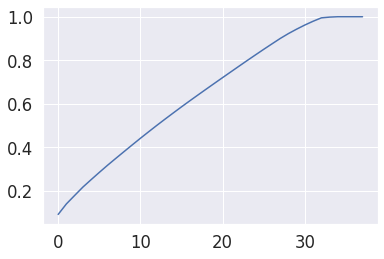

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# code here

pca = PCA()
sc = StandardScaler()
x_train_std=pca.fit_transform(x_train)
np.set_printoptions(suppress=True)
var_vs_pca = np.cumsum(pca.explained_variance_ratio_)
print([(i,x) for i, x in enumerate(var_vs_pca)])
# plotting the explained_variance_ratio against the number of components
plt.plot(var_vs_pca)

[(0, 0.09129829876882628), (1, 0.13965498251638492), (2, 0.1783578312103662), (3, 0.21673572836207589), (4, 0.25091827290172397), (5, 0.28441095398698096), (6, 0.31719028032989804), (7, 0.34866828856800114), (8, 0.37980359227444893), (9, 0.41076816390877624), (10, 0.44135763491056446), (11, 0.4712459726517391), (12, 0.5007926347021824), (13, 0.5295817209550874), (14, 0.5579410552958118), (15, 0.5860037182363459), (16, 0.6134769425540194), (17, 0.6405233002420325), (18, 0.6673701395155293), (19, 0.6940081951271505), (20, 0.720502636860788), (21, 0.746827151094989), (22, 0.7731357232530728), (23, 0.7992824292915695), (24, 0.8250389406411438), (25, 0.8505418595620441), (26, 0.8755491615990497), (27, 0.9002662470905268), (28, 0.9228026345765791), (29, 0.9431659606276278), (30, 0.9621967406606502), (31, 0.9794410925323944), (32, 0.9949084593586077), (33, 0.9983070958721263)]


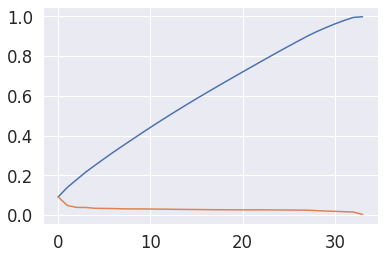

In [ ]:
#It is strating faltten with number of component = 34 (99% of variance)
pca = PCA(34)
x_train_std=pca.fit_transform(x_train)
np.set_printoptions(suppress=True)
var_vs_pca = np.cumsum(pca.explained_variance_ratio_)
print([(i,x) for i, x in enumerate(var_vs_pca)])
# plotting the explained_variance_ratio against the number of components
plt.plot(var_vs_pca)
plt.plot(pd.Series(pca.explained_variance_ratio_))

##### Step 2: Deciding number of components to keep
Use the plot to decide the number of components to keep, choose a number that explains atleast 95% of variance in the dataset. Then fit and transform your pca on training set using the number of components you decided.

**Remember that your pca should be trained on the training set (and transformed here) but only transformed on the test set.**

In [ ]:
# code here
pca = PCA(n_components=34)
x_train_Trans=pca.fit_transform(x_train)
x_test_Trans=pca.transform(x_test)

In [ ]:
# Print cell.
print('check_pca', (x_train_Trans[:50,:]))

check_pca [[-1.3838991  -0.85852892 -1.31930495 ...  0.63067578  0.33063991
  -0.00534801]
 [-1.96714704 -1.44302972 -1.24641971 ...  0.28984139 -1.04900918
   0.24581668]
 [-1.84641478  0.71242142 -1.06623197 ...  0.22220311  0.10693451
  -0.22619463]
 ...
 [ 0.37774881 -1.01558303 -0.20174008 ...  0.62650732 -0.42777416
  -0.15473918]
 [ 3.61369751  1.64807486 -0.55733017 ... -0.28225765 -1.41590647
   0.41312335]
 [ 0.76839011 -2.05399396 -0.10124339 ... -0.35490502  0.61395229
  -0.32288643]]


### 1.3.2.3 Random Forest.



##### Step 1: Hyperparameter tuning.
Use grid search and train a random forest model on the transformed train dataset. Take a look at the sklearn `RandomForestRegressor` documentation and tune the max_depth hyperparameter using grid search. We have already tested the number of estimators hyperparameter for you. Note this section may take a while to run depending on how large your grid is.

(Hint: refer to the GridSearchCV documentation and do some reading on how the max_depth in a RF model affects the result - while theory may help guide a rough estimate of possible hyperparameters, we can cross validate values using tools like GridSearch.

Our autograder has tiered points for this question depending on your final MSE value but is fairly generous; we are not requiring that you find the **most** optimal value for this hyperparameter but rather demonstrate understanding of grid search optimization.


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# Only tune the max depth of the trees in the RF hyperparameter.
grid = GridSearchCV(estimator=RandomForestRegressor(), param_grid={'n_estimators':[140],'max_depth':[25,30,35,40,45]},cv=5)
grid.fit(x_train_Trans, y_train)
grid.best_params_
# depth = [40]
# nEstimator = [140]

{'max_depth': 40, 'n_estimators': 140}

##### Step 2: Fitting RF
Fit the random forest on the training data using the parameters you computed above. Then make predictions on the test set, report the root mean squared error for the test set.

In [ ]:
# Set n_estimators = 140
reg_RF = RandomForestRegressor(n_estimators=140, max_depth=40)
reg_RF.fit(x_train_Trans, y_train)
y_pred_RF = reg_RF.predict(x_test_Trans)

In [ ]:
# Print cell
print('check_rf', (np.sqrt(mean_squared_error(y_test, y_pred_RF))))

check_rf 0.4819144258857594


## Almost halfway there :)

Well done! Almost halfway there :)



# Submission

**Submission on the blackboard**.
** PDF submission for the simalarity check and .ipynb for original submission **

Go to the "File" tab at the top left, and click "Download .ipynb". Submit under 'scalableMachinelearning.ipynb'.

You must submit your notebook to blackboard for the grading.

In [ ]:
#TO PDF
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Yourname_UID.ipynb')

# ***Technical Project 2***

AdaBoostRegressor and HistGradientBoostingRegressor models

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.K-fold cross-validation is a technique for evaluating predictive models. The dataset is divided into k subsets or folds. The model is trained and evaluated k times, using a different fold as the validation set each time.This method is used here.

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import  r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.datasets import make_regression
# Create AdaBoostRegressor object
adaboost_regr = AdaBoostRegressor(random_state=42, n_estimators=50)

# Train the model using the training sets
adaboost_regr.fit(x_train, y_train)

# Make predictions
y_predict_test_ada = adaboost_regr.predict(x_test)
y_predict_train_ada = adaboost_regr.predict(x_train)
#cross Validation for AdaBoostRegressor Model
kf_ada = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores_ada = cross_val_score(adaboost_regr, x_train, y_train, cv=kf_ada, scoring='neg_mean_squared_error')
mse_scores_ada = -mse_scores_ada

# Print the score
print('AdaBoostRegressor Model:')
print('r Squared: %.2f'% r2_score(y_test, y_predict_test_ada))
# Print mean squared error
print('MSE of Test=', mean_squared_error(y_test, y_predict_test_ada))
print('MSE of Train=', mean_squared_error(y_train, y_predict_train_ada))
print("Mean Squared Error Scores of AdaboostRegressor:", mse_scores_ada)
print("Mean of MSE of AdaboostRegressor:", np.mean(mse_scores_ada))




# Create HistGradientBoostingRegressor object
hist_gradboost_reg = HistGradientBoostingRegressor(max_iter=10, random_state=42)

# Train the model using the training sets
hist_gradboost_reg.fit(x_train, y_train)

# Make predictions
y_predict_test_hist = hist_gradboost_reg.predict(x_test)
y_predict_train_hist = hist_gradboost_reg.predict(x_train)

#cross Validation for HistGradientBoostingRegressor model
kf_hist = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores_hist = cross_val_score(hist_gradboost_reg, x_train, y_train, cv=kf_hist, scoring='neg_mean_squared_error')
mse_scores_hist = -mse_scores_hist


# Print metrics for HistGradientBoostingRegressor model
print('HistGradientBoostingRegressor Model:')
print('r Squared: %.2f' % r2_score(y_test, y_predict_test_hist))
# Print mean squared error
print('MSE of Test:', mean_squared_error(y_test, y_predict_test_hist))
print('MSE of Train:', mean_squared_error(y_train, y_predict_train_hist))
print("Mean Squared Error Scores of HistGradientBoostingRegressor:", mse_scores_hist)
print("Mean of MSE of HistGradientBoostingRegressor:", np.mean(mse_scores_hist))




AdaBoostRegressor Model:
r Squared: 0.80
MSE of Test= 0.6475980256343241
MSE of Train= 0.6487787767587755
Mean Squared Error Scores of AdaboostRegressor: [0.63800965 0.63387627 0.63900202 0.62328929 0.63083616]
Mean of MSE of AdaboostRegressor: 0.6330026760417174
HistGradientBoostingRegressor Model:
r Squared: 0.75
MSE of Test: 0.8157869226061611
MSE of Train: 0.8150173368845596
Mean Squared Error Scores of HistGradientBoostingRegressor: [0.81624681 0.82870606 0.81863931 0.81905107 0.81098872]
Mean of MSE of HistGradientBoostingRegressor: 0.818726393976033


In [ ]:
print('Check Adaboost Regressor:', np.sqrt(mean_squared_error(y_test, y_predict_test_ada)))
print('Check HistGradientBoostingRegressor Model :', np.sqrt(mean_squared_error(y_test, y_predict_test_hist)))


Check Adaboost Regressor: 0.8047347548318788
Check HistGradientBoostingRegressor Model : 0.9032092352307748


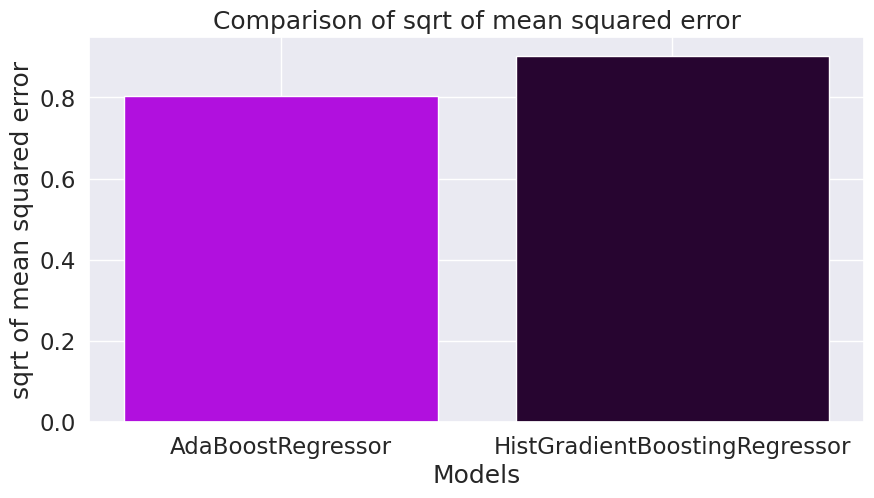

In [ ]:
Adabooster=np.sqrt(mean_squared_error(y_test, y_predict_test_ada))
Histgradient=np.sqrt(mean_squared_error(y_test, y_predict_test_hist))

# Bar graph for R-squared scores
Sqrt_mse = [Adabooster, Histgradient]
models = ['AdaBoostRegressor', 'HistGradientBoostingRegressor']

plt.figure(figsize=(10, 5))
plt.bar(models, Sqrt_mse, color=['#b110de', '#270530'])
plt.title('Comparison of sqrt of mean squared error')
plt.xlabel('Models')
plt.ylabel('sqrt of mean squared error')
plt.savefig('sqrt_MSE_before_tuning.png')
plt.show()


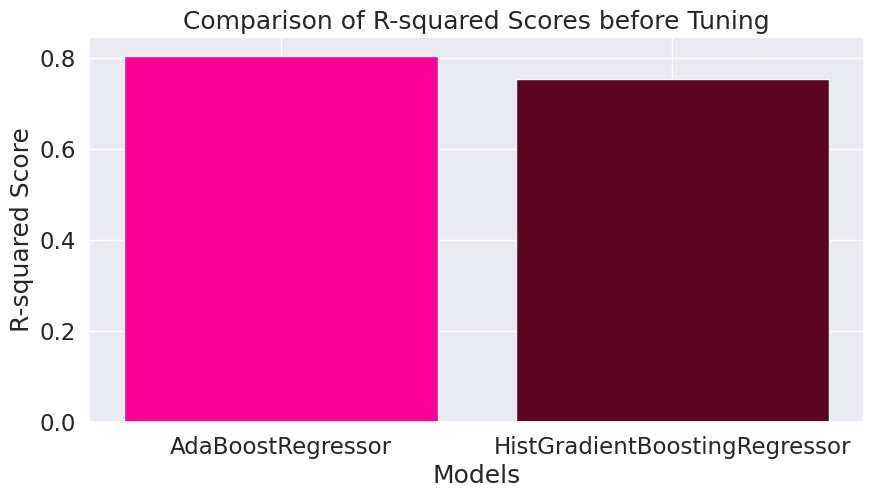

/n


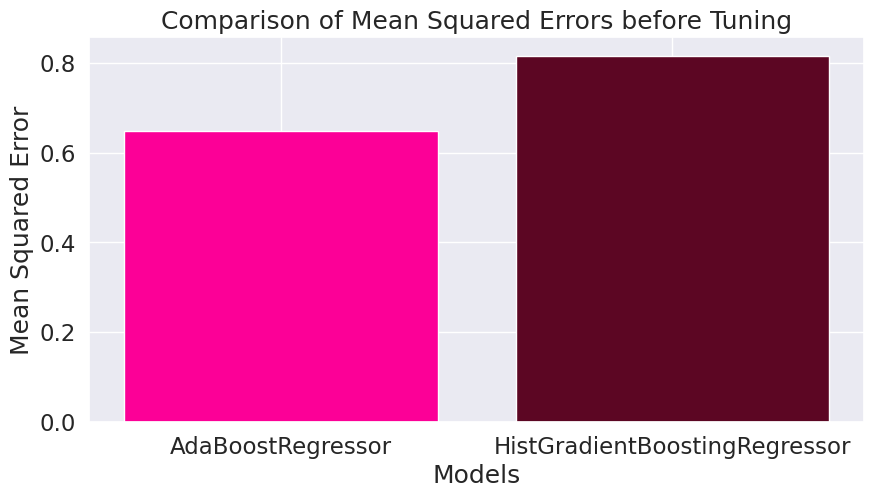

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
# Calculate metrics for AdaBoostRegressor
r2_ada_ = r2_score(y_test, y_predict_test_ada)
mse_ada_ = mean_squared_error(y_test, y_predict_test_ada)

# Calculate metrics for HistGradientBoostingRegressor
r2_hist_ = r2_score(y_test, y_predict_test_hist)
mse_hist_ = mean_squared_error(y_test, y_predict_test_hist)

# Bar graph for R-squared scores
r_squared_scores = [r2_ada_, r2_hist_]
models = ['AdaBoostRegressor', 'HistGradientBoostingRegressor']

plt.figure(figsize=(10, 5))
plt.bar(models, r_squared_scores, color=['#fc0097', '#5c0623'])
plt.title('Comparison of R-squared Scores before Tuning')
plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.savefig('Comparison_Rsquare.png')
plt.show()

# Bar graph for mean squared errors
mse_scores = [mse_ada_, mse_hist_]
print("/n")
plt.figure(figsize=(10, 5))
plt.bar(models, mse_scores, color=['#fc0097', '#5c0623'])
plt.title('Comparison of Mean Squared Errors before Tuning')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.savefig('Comparison_MSE.png')
plt.show()


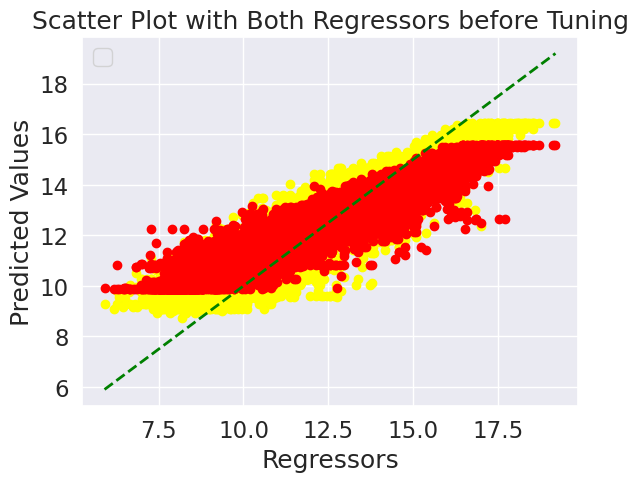

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict_test_ada,color='yellow')
plt.scatter(y_test, y_predict_test_hist,color='red')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='green', linewidth=2)


# Add labels and title
plt.xlabel('Regressors')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot with Both Regressors before Tuning')
plt.legend()

# Show the plot
plt.show()


# **Tuning Process of Regressors**

Hyperparameter tuning allows data scientists to tweak model performance for optimal results. This process is an essential part of machine learning, and choosing appropriate hyperparameter values is crucial for success.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import randint, uniform

# Create AdaBoostRegressor object
ada_regr = AdaBoostRegressor(random_state=0)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [10, 20, 15],
    'learning_rate': [0.01, 0.1, 0.5, 1.0]
}

# Define the scoring metric
scoring = {'MSE': make_scorer(mean_squared_error)}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=ada_regr, param_grid=param_grid, scoring=scoring, refit='MSE', cv=5)

# Fit the model with the training data
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters AdaBoosterRegressor:", best_params)

# Get the best model
best_ada_regr = grid_search.best_estimator_

# Make predictions
y_predict_test_best_ada = best_ada_regr.predict(x_test)
y_predict_train_best_ada = best_ada_regr.predict(x_train)

# Print the best model's score and mean squared error
print('Best Model - r Squared: %.2f' % best_ada_regr.score(x_test, y_predict_test_best_ada))
print('Best Model - MSE of Test:', mean_squared_error(y_test, y_predict_test_best_ada))
print('Best Model - MSE of Train:', mean_squared_error(y_train, y_predict_train_best_ada))

# Create HistGradientBoostingRegressor object
hist_gradboost_reg = HistGradientBoostingRegressor(random_state=42)

# Define the parameter distributions to search
param_dist = {
    'max_iter': randint(50, 100),
    'max_leaf_nodes': randint(10, 50),
    'learning_rate': uniform(0.01, 0.5),
    'min_samples_leaf': randint(1, 20),
    'l2_regularization': uniform(0.0, 0.1),
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=hist_gradboost_reg, param_distributions=param_dist, n_iter=10,
                                   scoring='r2', cv=5, random_state=42, n_jobs=-1)

# Fit the model with the training data
random_search.fit(x_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters HistGradientBoostingRegressor:", best_params)

# Get the best model
best_hist_grad_boost_reg = random_search.best_estimator_

# Make predictions
y_predict_test_best_hist = best_hist_grad_boost_reg.predict(x_test)
y_predict_train_best_hist = best_hist_grad_boost_reg.predict(x_train)

# Print the best model's score and mean squared error
print('Best Model - r Squared: %.2f' %r2_score(y_test, y_predict_test_best_hist))
print('Best Model - MSE of Test:', mean_squared_error(y_test, y_predict_test_best_hist))
print('Best Model - MSE of Train:', mean_squared_error(y_train, y_predict_train_best_hist))



Best Parameters AdaBoosterRegressor: {'learning_rate': 0.01, 'n_estimators': 10}
Best Model - r Squared: 1.00
Best Model - MSE of Test: 0.7167766949160366
Best Model - MSE of Train: 0.7181506891053807
Best Parameters HistGradientBoostingRegressor: {'l2_regularization': 0.017336465350777208, 'learning_rate': 0.2055303037866204, 'max_iter': 99, 'max_leaf_nodes': 49, 'min_samples_leaf': 4}
Best Model - r Squared: 0.92
Best Model - MSE of Test: 0.27078684805043096
Best Model - MSE of Train: 0.24286193679760443


In [ ]:
print('check adaboost Regressor after tuning:', np.sqrt(mean_squared_error(y_test, y_predict_test_best_ada)))
print('check HistGradientBoostingRegressor Model after tuning:', np.sqrt(mean_squared_error(y_test, y_predict_test_best_hist)))

check adaboost Regressor after tuning: 0.8466266561572678
check HistGradientBoostingRegressor Model after tuning: 0.5203718363347799


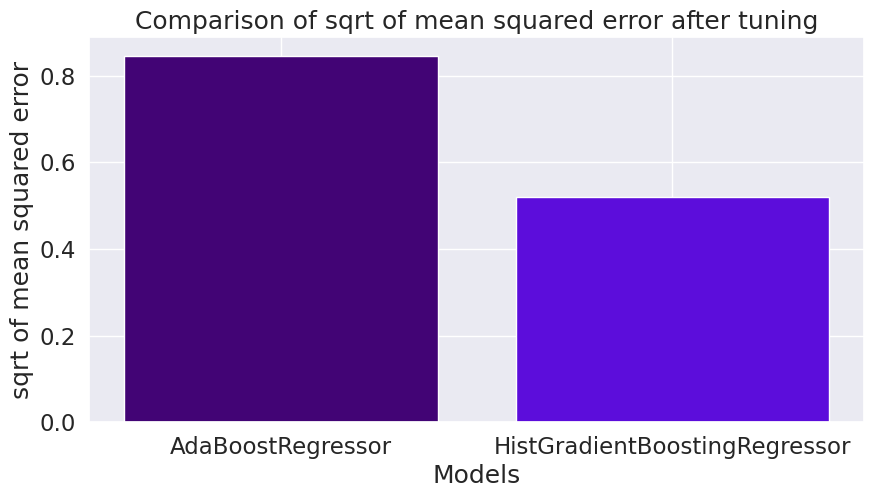

In [ ]:
Adabooster_tun=np.sqrt(mean_squared_error(y_test, y_predict_test_best_ada))
Histgradient_tun=np.sqrt(mean_squared_error(y_test, y_predict_test_best_hist))

# Bar graph for R-squared scores
Sqrt_mse = [Adabooster_tun, Histgradient_tun]
models = ['AdaBoostRegressor', 'HistGradientBoostingRegressor']

plt.figure(figsize=(10, 5))
plt.bar(models, Sqrt_mse, color=['#420475', '#5c0ddb'])
plt.title('Comparison of sqrt of mean squared error after tuning')
plt.xlabel('Models')
plt.ylabel('sqrt of mean squared error')
plt.savefig('Comparison_sqrt_MSE.png')
plt.show()


# ***Comparison of Regressors***

In [ ]:
# Print metrics for AdaBoostRegressor model
print('AdaBoostRegressor Model:')
print('r Squared: %.2f' % r2_score(y_test, y_predict_test_ada))
print('MSE of Test:', mean_squared_error(y_test, y_predict_test_ada))
print('MSE of Train:', mean_squared_error(y_train, y_predict_train_ada))
print("Mean Squared Error Scores of AdaBoostRegressor model:", mse_scores_ada)
print("Mean of MSE of AdaBoostRegressor model:", np.mean(mse_scores_ada))
print('check AdaBoostRegressor model :', np.sqrt(mean_squared_error(y_test, y_predict_test_ada)))


# Print the best model's score and mean squared error
print('\nAdaBoostingRegressor Model after tuning:')
print('Best Model - r Squared: %.2f' % best_ada_regr.score(x_test, y_test))
print('Best Model - MSE of Test:', mean_squared_error(y_test, y_predict_test_best_ada))
print('Best Model - MSE of Train:', mean_squared_error(y_train, y_predict_train_best_ada))
print('check adaboost Regressor after tuning:', np.sqrt(mean_squared_error(y_test, y_predict_test_best_ada)))


# Print metrics for HistGradientBoostingRegressor model
print('\nHistGradientBoostingRegressor Model:')
print('r Squared: %.2f' % r2_score(y_test, y_predict_test_hist))
print('MSE of Test:', mean_squared_error(y_test, y_predict_test_hist))
print('MSE of Train:', mean_squared_error(y_train, y_predict_train_hist))
print("Mean Squared Error Scores of HistGradientBoostingRegressor:", mse_scores_hist)
print("Mean of MSE of HistGradientBoostingRegressor:", np.mean(mse_scores_hist))
print('check HistGradientBoostingRegressor :', np.sqrt(mean_squared_error(y_test, y_predict_test_ada)))


# Print the best model's score and mean squared error
print('\nHistGradientBoostingRegressor Model after tuning:')
print('Best Model - r Squared: %.2f' %r2_score(y_test, y_predict_test_best_hist))
print('Best Model - MSE of Test:', mean_squared_error(y_test, y_predict_test_best_hist))
print('Best Model - MSE of Train:', mean_squared_error(y_train, y_predict_train_best_hist))
print('check HistGradientBoostingRegressor Model after tuning:', np.sqrt(mean_squared_error(y_test, y_predict_test_best_hist)))


AdaBoostRegressor Model:
r Squared: 0.80
MSE of Test: 0.6475980256343241
MSE of Train: 0.6487787767587755
Mean Squared Error Scores of AdaBoostRegressor model: [0.63800965 0.63387627 0.63900202 0.62328929 0.63083616]
Mean of MSE of AdaBoostRegressor model: 0.6330026760417174
check AdaBoostRegressor model : 0.8047347548318788

AdaBoostingRegressor Model after tuning:
Best Model - r Squared: 0.78
Best Model - MSE of Test: 0.7167766949160366
Best Model - MSE of Train: 0.7181506891053807
check adaboost Regressor after tuning: 0.8466266561572678

HistGradientBoostingRegressor Model:
r Squared: 0.75
MSE of Test: 0.8157869226061611
MSE of Train: 0.8150173368845596
Mean Squared Error Scores of HistGradientBoostingRegressor: [0.81624681 0.82870606 0.81863931 0.81905107 0.81098872]
Mean of MSE of HistGradientBoostingRegressor: 0.818726393976033
check HistGradientBoostingRegressor : 0.8047347548318788

HistGradientBoostingRegressor Model after tuning:
Best Model - r Squared: 0.92
Best Model - MSE

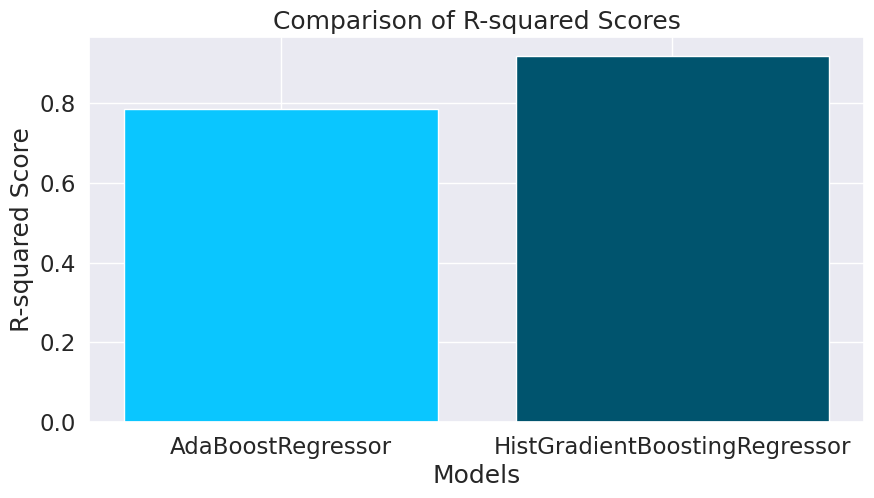

/n


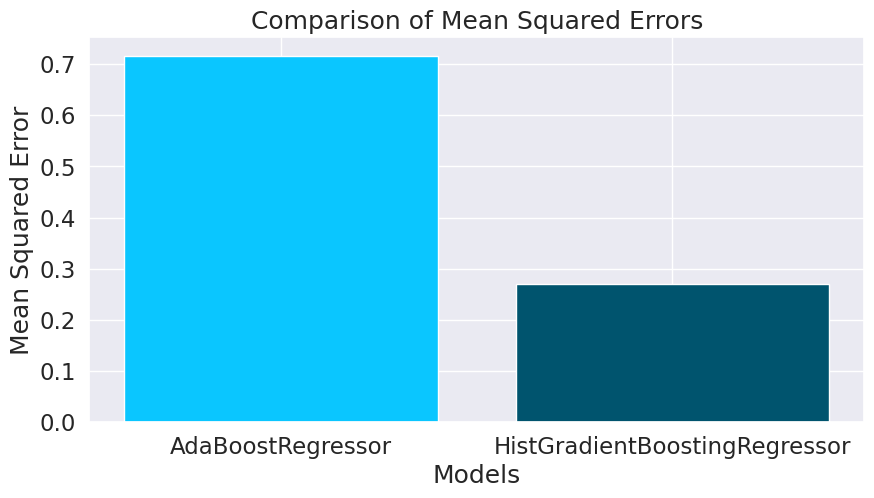

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
# Calculate metrics for AdaBoostRegressor
r2_ada = r2_score(y_test, y_predict_test_best_ada)
mse_ada = mean_squared_error(y_test, y_predict_test_best_ada)

# Calculate metrics for HistGradientBoostingRegressor
r2_hist = r2_score(y_test, y_predict_test_best_hist)
mse_hist = mean_squared_error(y_test, y_predict_test_best_hist)

# Bar graph for R-squared scores
r_squared_scores = [r2_ada, r2_hist]
models = ['AdaBoostRegressor', 'HistGradientBoostingRegressor']

plt.figure(figsize=(10, 5))
plt.bar(models, r_squared_scores, color=['#0ac6ff', '#00546e'])
plt.title('Comparison of R-squared Scores')
plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.savefig('Comparison_Rsquare.png')
plt.show()

# Bar graph for mean squared errors
mse_scores = [mse_ada, mse_hist]
print("/n")
plt.figure(figsize=(10, 5))
plt.bar(models, mse_scores, color=['#0ac6ff', '#00546e'])
plt.title('Comparison of Mean Squared Errors')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.savefig('Comparison_MSE.png')
plt.show()


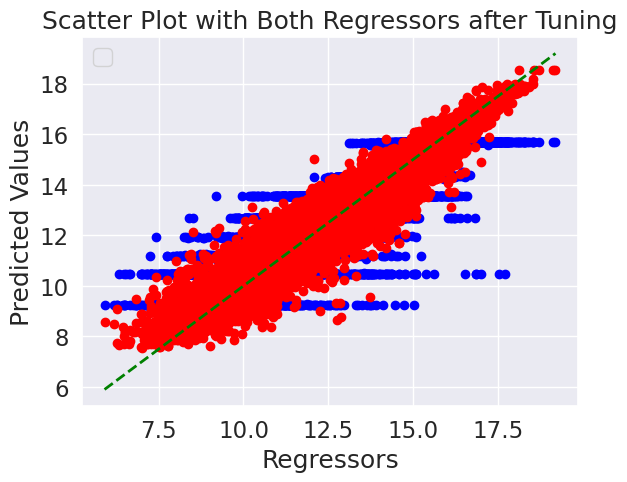

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict_test_best_ada,color='blue')
plt.scatter(y_test, y_predict_test_best_hist,color='red')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='green', linewidth=2)


# Add labels and title
plt.xlabel('Regressors')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot with Both Regressors after Tuning')
plt.legend()

# Show the plot
plt.show()
